# **Capstone Project**
# **The Battle of Neighborhoods in Cologne: Bars**

### This is a final project part of the IBM Data Science Professional Certificate, in which we are going to explore the data of the emblematic city of Cologne, Germany and specially the bars of the zone.

### I have great interest in exploring the bars because Cologne is home of the famous Kölsh beer which is by most the best beer I have drunk and it would be great that you could know where are the best bars to try this local specialty.

## 1. Introduction

### This project is intented to give an overview to the tourists and the students in the area of which are the best bars they could go in order to finish in the best way their visit to Cologne, one of the main things that someone needs to try here is a Kölsch beer, so it would be exceptional if the could enjoy it in the best place, so this tool will provide support to the different needs of the people in terms of having a great Bier!!!

## 2. Data Preparation

### First we import all the necessary packages and libraries in order to work, this will help us in the second part of the project in order to cluster the data

In [1]:
import numpy as np # library to handle data in a vectorized manner
import requests

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### It is important to gather the neighboorhoos and boroughs information of Cologne, in order to do that we extract it from Wikipedia, but we will need to clean-up this data to make it work

In [2]:
url = 'https://en.wikipedia.org/wiki/Districts_of_Cologne'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[1]
df.head()

,Map,Coat,City district,City parts,Area,Population1,Pop. density,District Councils,Town Hall
0,NaN,NaN,District 1 Köln-Innenstadt,"Altstadt-Nord, Altstadt-Süd, Deutz, Neustadt-N...",16.4 km²,127.033,7.746/km²,"Bezirksksamt Innenstadt Brückenstraße 19, D-50...",NaN
1,NaN,NaN,District 2 Köln-Rodenkirchen,"Bayenthal, Godorf, Hahnwald, Immendorf, Marien...",54.6 km²,100.936,1.850/km²,"Bezirksamt Rodenkirchen Hauptstraße 85, D-5099...",NaN
2,NaN,NaN,District 3 Köln-Lindenthal,"Braunsfeld, Junkersdorf, Klettenberg, Lindenth...",41.6 km²,137.552,3.308/km²,"Bezirksamt Lindenthal Aachener Straße 220, 509...",NaN
3,NaN,NaN,District 4 Köln-Ehrenfeld,"Bickendorf, Bocklemünd/Mengenich, Ehrenfeld, N...",23.8 km²,103.621,4.348/km²,"Bezirksamt Ehrenfeld Venloer Straße 419 – 421,...",NaN
4,NaN,NaN,District 5 Köln-Nippes,"Bilderstöckchen, Longerich, Mauenheim, Niehl, ...",31.8 km²,110.092,3.462/km²,"Bezirksamt NippesNeusser Straße 450,D-50733 Köln",NaN


### Since we only need the information of the Boroughs and Neighborhoods we only extract this information

In [3]:
df = df[['City district','City parts']]
df.head()

,City district,City parts
0,District 1 Köln-Innenstadt,"Altstadt-Nord, Altstadt-Süd, Deutz, Neustadt-N..."
1,District 2 Köln-Rodenkirchen,"Bayenthal, Godorf, Hahnwald, Immendorf, Marien..."
2,District 3 Köln-Lindenthal,"Braunsfeld, Junkersdorf, Klettenberg, Lindenth..."
3,District 4 Köln-Ehrenfeld,"Bickendorf, Bocklemünd/Mengenich, Ehrenfeld, N..."
4,District 5 Köln-Nippes,"Bilderstöckchen, Longerich, Mauenheim, Niehl, ..."


### As you can see the data set contains some information within the cells that we don´t need, so we will apply some steps to extract and separate the information, so that later we can find the latitudes and longitudes

In [4]:
df.rename(columns={'City district': 'BoroughPrev', 'City parts': 'Neighborhoods'}, inplace=True)
df.head()

C:\Users\dante\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,BoroughPrev,Neighborhoods
0,District 1 Köln-Innenstadt,"Altstadt-Nord, Altstadt-Süd, Deutz, Neustadt-N..."
1,District 2 Köln-Rodenkirchen,"Bayenthal, Godorf, Hahnwald, Immendorf, Marien..."
2,District 3 Köln-Lindenthal,"Braunsfeld, Junkersdorf, Klettenberg, Lindenth..."
3,District 4 Köln-Ehrenfeld,"Bickendorf, Bocklemünd/Mengenich, Ehrenfeld, N..."
4,District 5 Köln-Nippes,"Bilderstöckchen, Longerich, Mauenheim, Niehl, ..."


In [5]:
df[['BoroughLast','Borough']] = df.BoroughPrev.str.split("-",expand=True,)
df.head()

C:\Users\dante\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,BoroughPrev,Neighborhoods,BoroughLast,Borough
0,District 1 Köln-Innenstadt,"Altstadt-Nord, Altstadt-Süd, Deutz, Neustadt-N...",District 1 Köln,Innenstadt
1,District 2 Köln-Rodenkirchen,"Bayenthal, Godorf, Hahnwald, Immendorf, Marien...",District 2 Köln,Rodenkirchen
2,District 3 Köln-Lindenthal,"Braunsfeld, Junkersdorf, Klettenberg, Lindenth...",District 3 Köln,Lindenthal
3,District 4 Köln-Ehrenfeld,"Bickendorf, Bocklemünd/Mengenich, Ehrenfeld, N...",District 4 Köln,Ehrenfeld
4,District 5 Köln-Nippes,"Bilderstöckchen, Longerich, Mauenheim, Niehl, ...",District 5 Köln,Nippes


In [6]:
df = df[['Borough','Neighborhoods']]
df.drop([9,10], axis=0, inplace= True)
df

,Borough,Neighborhoods
0,Innenstadt,"Altstadt-Nord, Altstadt-Süd, Deutz, Neustadt-N..."
1,Rodenkirchen,"Bayenthal, Godorf, Hahnwald, Immendorf, Marien..."
2,Lindenthal,"Braunsfeld, Junkersdorf, Klettenberg, Lindenth..."
3,Ehrenfeld,"Bickendorf, Bocklemünd/Mengenich, Ehrenfeld, N..."
4,Nippes,"Bilderstöckchen, Longerich, Mauenheim, Niehl, ..."
5,Chorweiler,"Blumenberg, Chorweiler, Esch/Auweiler, Fühling..."
6,Porz,"Eil, Elsdorf, Ensen, Finkenberg, Gremberghoven..."
7,Kalk,"Brück, Höhenberg, Humboldt/Gremberg, Kalk, Mer..."
8,Mülheim,"Buchforst, Buchheim, Dellbrück, Dünnwald, Flit..."


### The final step of extracting the necessary information is by splitting the information of every cell into different rows, we can do this because every neighborhood is separated by a comma.

In [7]:
df = pd.DataFrame(df.Neighborhoods.str.split(',').tolist(), index=df.Borough).stack()
df = df.reset_index([0, 'Borough'])
df.columns = ['Borough', 'Neighborhoods']
df.head(10)

,Borough,Neighborhoods
0,Innenstadt,Altstadt-Nord
1,Innenstadt,Altstadt-Süd
2,Innenstadt,Deutz
3,Innenstadt,Neustadt-Nord
4,Innenstadt,Neustadt-Süd
5,Rodenkirchen,Bayenthal
6,Rodenkirchen,Godorf
7,Rodenkirchen,Hahnwald
8,Rodenkirchen,Immendorf
9,Rodenkirchen,Marienburg


### In order to get the latitude and longitude of each neighborhood we use geopy client, joining it with the set of the boroughs and neighborhoods our data frame is completed

In [8]:
cologne_coor = pd.DataFrame(columns = ['Latitude','Longitude'])
geolocator = Nominatim(user_agent="Cologne")
for row in df['Neighborhoods']:
    location = geolocator.geocode(row)
    cologne_coor = cologne_coor.append({'Latitude':location.latitude, 'Longitude':location.longitude}, ignore_index=True)
df = df.join(cologne_coor)
df

,Borough,Neighborhoods,Latitude,Longitude
0,Innenstadt,Altstadt-Nord,50.942265,6.953188
1,Innenstadt,Altstadt-Süd,50.929181,6.955329
2,Innenstadt,Deutz,50.936759,6.973046
3,Innenstadt,Neustadt-Nord,50.947906,6.941059
4,Innenstadt,Neustadt-Süd,50.926560,6.940406
5,Rodenkirchen,Bayenthal,50.911058,6.969238
6,Rodenkirchen,Godorf,50.849154,6.975350
7,Rodenkirchen,Hahnwald,49.662407,9.265221
8,Rodenkirchen,Immendorf,48.646985,16.127598
9,Rodenkirchen,Marienburg,54.035936,19.034882


### We can check how many Boroughs and Neighborhoos the dataset has

In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df['Borough'].unique()),
        df.shape[0]
    )
)

The dataframe has 9 boroughs and 86 neighborhoods.


### Finally in order to verify our data we map the latitude and longitude of each neighborhood on the map of Cologne

In [10]:
address = 'Cologne'

geolocator = Nominatim(user_agent="Cologne")
location = geolocator.geocode(address)
latitude_cologne = location.latitude
longitude_cologne = location.longitude

print('The geographical coordinate of Cologne are {}, {}'.format(latitude_cologne, longitude_cologne))

map_cologne = folium.Map(location=[latitude_cologne, longitude_cologne], zoom_start=12)

# add markers to map
for lat, lng, postal in zip(df['Latitude'],df['Longitude'],df['Neighborhoods']):
    label = str(postal)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [float(lat), float(lng)],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cologne)  
    
map_cologne

The geographical coordinate of Cologne are 50.938361, 6.959974


## 3. Exploration of the Cologne Neighborhoods and Data

### Definition of Foursquare credentials and Version

In [11]:
CLIENT_ID = 'Z3HSOD3DJNW0S3XZ2BLXOEBO1L22I10I5F2P4031BYG4PZEF' # your Foursquare ID
CLIENT_SECRET = 'TYWPKE4MXT4V1TE3DOBSNZI3JQWVITTUEYRTTR1OK05Q1UKP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Z3HSOD3DJNW0S3XZ2BLXOEBO1L22I10I5F2P4031BYG4PZEF
CLIENT_SECRET:TYWPKE4MXT4V1TE3DOBSNZI3JQWVITTUEYRTTR1OK05Q1UKP


### Function in order to get the Venues of each Neighborhood

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### We create a new data frame called cologne_venues to get the venues of each neighborhood

In [13]:
cologne_venues = getNearbyVenues(names=df['Neighborhoods'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Altstadt-Nord
 Altstadt-Süd
 Deutz
 Neustadt-Nord
 Neustadt-Süd
Bayenthal
 Godorf
 Hahnwald
 Immendorf
 Marienburg
 Meschenich
 Raderberg
 Raderthal
 Rodenkirchen
 Rondorf
 Sürth
 Weiß
 Zollstock
Braunsfeld
 Junkersdorf
 Klettenberg
 Lindenthal
 Lövenich
 Müngersdorf
 Sülz
 Weiden
 Widdersdorf
Bickendorf
 Bocklemünd/Mengenich
 Ehrenfeld
 Neuehrenfeld
 Ossendorf
 Vogelsang
Bilderstöckchen
 Longerich
 Mauenheim
 Niehl
 Nippes
 Riehl
 Weidenpesch
Blumenberg
 Chorweiler
 Esch/Auweiler
 Fühlingen
 Heimersdorf
 Lindweiler
 Merkenich
 Pesch
 Roggendorf/Thenhoven
 Seeberg
 Volkhoven/Weiler
 Worringen
Eil
 Elsdorf
 Ensen
 Finkenberg
 Gremberghoven
 Grengel
 Langel
 Libur
 Lind
 Poll
 Porz
 Urbach
 Wahn
 Wahnheide
 Westhoven
 Zündorf
Brück
 Höhenberg
 Humboldt/Gremberg
 Kalk
 Merheim
 Neubrück
 Ostheim
 Rath/Heumar
 Vingst
Buchforst
 Buchheim
 Dellbrück
 Dünnwald
 Flittard
 Höhenhaus
 Holweide
 Mülheim
 Stammheim


### The dataframe is printed in ordet to check the information

In [14]:
print(cologne_venues.shape)
cologne_venues.head()

(601, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Altstadt-Nord,50.942265,6.953188,Excelsior Hotel Ernst,50.942222,6.956282,Hotel
1,Altstadt-Nord,50.942265,6.953188,KölnTourismus,50.941554,6.956278,Tourist Information Center
2,Altstadt-Nord,50.942265,6.953188,Kuchi Mami,50.941390,6.954036,Asian Restaurant
3,Altstadt-Nord,50.942265,6.953188,Punto Pasta,50.942301,6.955168,Italian Restaurant
4,Altstadt-Nord,50.942265,6.953188,Enoteca La Cantina,50.944522,6.955899,Gourmet Shop


### Since we are interested in venues where we can get a beer, we check all venues category in order to obtain the venues of our interest which will be, all bars, pubs and german restaurants

In [15]:
print (cologne_venues['Venue Category'].value_counts())

Supermarket                      51
Hotel                            42
Italian Restaurant               29
Bakery                           23
Tram Station                     18
Café                             17
Restaurant                       17
German Restaurant                13
Drugstore                        13
Ice Cream Shop                   12
Bus Stop                         12
Gastropub                        11
Sushi Restaurant                 10
Bar                              10
Plaza                            10
Coffee Shop                       8
French Restaurant                 8
Greek Restaurant                  7
Pizza Place                       7
Gas Station                       6
Pharmacy                          6
Burger Joint                      6
Gym / Fitness Center              6
Fast Food Restaurant              5
Shopping Mall                     5
Organic Grocery                   5
Thai Restaurant                   5
Soccer Field                

### The previous information is extracted and then we create a new dataframe called cologne_Venues_only_bar 

In [16]:
# Create a Data-Frame out of it to Concentrate Only on Bars, Pubs, Beer Gartens of german restaurants
cologne_Venues_only_bar1 = cologne_venues[cologne_venues['Venue Category'].str.contains('Beer')].reset_index(drop=True)
cologne_Venues_only_bar2 = cologne_venues[cologne_venues['Venue Category'].str.contains('Pub')].reset_index(drop=True)
cologne_Venues_only_bar3 = cologne_venues[cologne_venues['Venue Category'].str.contains('Gastropub')].reset_index(drop=True)
cologne_Venues_only_bar4 = cologne_venues[cologne_venues['Venue Category'].str.contains('Bar')].reset_index(drop=True)
cologne_Venues_only_bar5 = cologne_venues[cologne_venues['Venue Category'].str.contains('German')].reset_index(drop=True)
frames = [cologne_Venues_only_bar1, cologne_Venues_only_bar2, cologne_Venues_only_bar3, cologne_Venues_only_bar4, cologne_Venues_only_bar5]

cologne_Venues_only_bar = pd.concat(frames)
cologne_Venues_only_bar.index = np.arange(1, len(cologne_Venues_only_bar )+1)

### In order to see in a better way the information and the preferences in which spots are more representative we plot the information

In [17]:
# New DataFrame to plot it later
cologne_Venues_only_bar_1 = cologne_Venues_only_bar['Venue Category'].value_counts().to_frame(name='frequency')
cologne_Venues_only_bar_1 = cologne_Venues_only_bar_1.reset_index()
cologne_Venues_only_bar_1.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
cologne_Venues_only_bar_1

,Venue_Category,Frequency
0,German Restaurant,13
1,Gastropub,11
2,Bar,10
3,Pub,5
4,Beer Garden,3
5,Wine Bar,1
6,Hookah Bar,1
7,Cocktail Bar,1


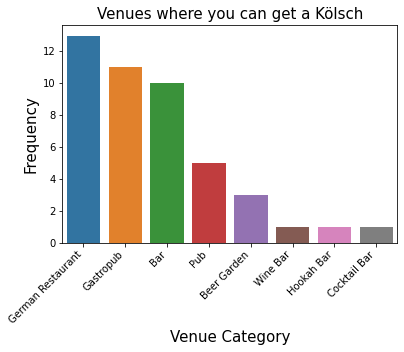

<Figure size 1296x504 with 0 Axes>

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=cologne_Venues_only_bar_1)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Venues where you can get a Kölsch', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
fig = plt.figure(figsize=(18,7))
plt.show()

### We check how many venues were returned for each neighborhood

In [19]:
cologne_Venues_only_bar.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Altstadt-Süd,1,1,1,1,1,1
Dellbrück,2,2,2,2,2,2
Deutz,2,2,2,2,2,2
Finkenberg,2,2,2,2,2,2
Junkersdorf,1,1,1,1,1,1
Libur,1,1,1,1,1,1
Lindenthal,1,1,1,1,1,1
Longerich,1,1,1,1,1,1
Mauenheim,1,1,1,1,1,1


### And we get number of bars by neighborhood. This will help us in the final part when we plot the map, so that we can see where are the majority of the bars depending on the size of the bubbles

In [20]:
cologne_Venues_bar = cologne_Venues_only_bar.groupby(['Neighborhood'])['Venue Category'].count()

In [21]:
cologne_Venues_bar_df = cologne_Venues_bar.to_frame().reset_index()
list_bar_no = cologne_Venues_bar_df['Venue Category'].to_list()
list_neig = cologne_Venues_bar_df['Neighborhood'].to_list()

## 3. Analyze each Neigborhood

In [22]:
# one hot encoding
cologne_onehot = pd.get_dummies(cologne_Venues_only_bar[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cologne_onehot['Neighborhood'] = cologne_Venues_only_bar['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cologne_onehot.columns[-1]] + list(cologne_onehot.columns[:-1])
cologne_onehot = cologne_onehot[fixed_columns]

cologne_onehot.head()

,Neighborhood,Bar,Beer Garden,Cocktail Bar,Gastropub,German Restaurant,Hookah Bar,Pub,Wine Bar
1,Neuehrenfeld,0,1,0,0,0,0,0,0
2,Weidenpesch,0,1,0,0,0,0,0,0
3,Poll,0,1,0,0,0,0,0,0
4,Neustadt-Nord,0,0,0,0,0,0,1,0
5,Weiden,0,0,0,0,0,0,1,0


In [23]:
cologne_onehot.shape

(45, 9)

### The rows are grouped by neighborhood and by taking the mean of the frequency of ocurrence of each category

In [24]:
cologne_grouped = cologne_onehot.groupby('Neighborhood').mean().reset_index()
cologne_grouped

,Neighborhood,Bar,Beer Garden,Cocktail Bar,Gastropub,German Restaurant,Hookah Bar,Pub,Wine Bar
0,Altstadt-Süd,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00
1,Dellbrück,0.000000,0.0,0.000000,0.500000,0.500000,0.0,0.000000,0.00
2,Deutz,0.000000,0.0,0.000000,0.500000,0.500000,0.0,0.000000,0.00
3,Finkenberg,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.00
4,Junkersdorf,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.00
5,Libur,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.00
6,Lindenthal,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.00
7,Longerich,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.00
8,Mauenheim,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.00
9,Merheim,0.000000,0.0,0.000000,0.666667,0.333333,0.0,0.000000,0.00


In [25]:
cologne_grouped.shape

(24, 9)

### We pint each neighborhood along with the top 5 most common venues

In [26]:
num_top_venues = 5

for hood in cologne_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = cologne_grouped[cologne_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Altstadt-Süd----
               venue  freq
0                Bar   1.0
1        Beer Garden   0.0
2       Cocktail Bar   0.0
3          Gastropub   0.0
4  German Restaurant   0.0


---- Dellbrück----
               venue  freq
0          Gastropub   0.5
1  German Restaurant   0.5
2                Bar   0.0
3        Beer Garden   0.0
4       Cocktail Bar   0.0


---- Deutz----
               venue  freq
0          Gastropub   0.5
1  German Restaurant   0.5
2                Bar   0.0
3        Beer Garden   0.0
4       Cocktail Bar   0.0


---- Finkenberg----
          venue  freq
0           Pub   1.0
1           Bar   0.0
2   Beer Garden   0.0
3  Cocktail Bar   0.0
4     Gastropub   0.0


---- Junkersdorf----
               venue  freq
0  German Restaurant   1.0
1                Bar   0.0
2        Beer Garden   0.0
3       Cocktail Bar   0.0
4          Gastropub   0.0


---- Libur----
               venue  freq
0          Gastropub   1.0
1                Bar   0.0
2        Beer Gar

### Function to sort the venues in descending order

In [27]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Since we have a few venues, we can take the total column length of the cologne groped array in order to display all venues for each neighborhood

In [28]:
num_top_venues = len(cologne_grouped.columns) -1 

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = cologne_grouped['Neighborhood']

for ind in np.arange(cologne_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cologne_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Altstadt-Süd,Bar,Wine Bar,Pub,Hookah Bar,German Restaurant,Gastropub,Cocktail Bar,Beer Garden
1,Dellbrück,German Restaurant,Gastropub,Wine Bar,Pub,Hookah Bar,Cocktail Bar,Beer Garden,Bar
2,Deutz,German Restaurant,Gastropub,Wine Bar,Pub,Hookah Bar,Cocktail Bar,Beer Garden,Bar
3,Finkenberg,Pub,Wine Bar,Hookah Bar,German Restaurant,Gastropub,Cocktail Bar,Beer Garden,Bar
4,Junkersdorf,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar


## 4. Cluster Neighborhoods

### Run k-means to cluster the neighborhood into 4 clusters

In [29]:
# set number of clusters
kclusters = 4

cologne_grouped_clustering = cologne_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cologne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 2, 1, 0, 2, 2, 2, 0, 2])

### New dataframe that includes the cluster as well as all venues for each neighborhood

In [30]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cologne_merged = df


cologne_merged = cologne_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhoods')

cologne_merged 

,Borough,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Innenstadt,Altstadt-Nord,50.942265,6.953188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Innenstadt,Altstadt-Süd,50.929181,6.955329,1.0,Bar,Wine Bar,Pub,Hookah Bar,German Restaurant,Gastropub,Cocktail Bar,Beer Garden
2,Innenstadt,Deutz,50.936759,6.973046,2.0,German Restaurant,Gastropub,Wine Bar,Pub,Hookah Bar,Cocktail Bar,Beer Garden,Bar
3,Innenstadt,Neustadt-Nord,50.947906,6.941059,1.0,Pub,Gastropub,Bar,Wine Bar,Hookah Bar,German Restaurant,Cocktail Bar,Beer Garden
4,Innenstadt,Neustadt-Süd,50.926560,6.940406,1.0,Bar,Gastropub,Cocktail Bar,Wine Bar,Pub,Hookah Bar,German Restaurant,Beer Garden
5,Rodenkirchen,Bayenthal,50.911058,6.969238,0.0,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar
6,Rodenkirchen,Godorf,50.849154,6.975350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Rodenkirchen,Hahnwald,49.662407,9.265221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Rodenkirchen,Immendorf,48.646985,16.127598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Rodenkirchen,Marienburg,54.035936,19.034882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### But as we go through the information we identify some problems, the first one are all the NaN values, we can drop them with the dropna function and the other problem is that some negihborhoods were not right related with their correct latitude and longitude so we manually put the correct value

In [31]:
cologne_merged.dropna(inplace=True)
cologne_merged.reset_index(inplace = True) 

#Finkenberg
cologne_merged.loc[15,'Latitude'] = 50.896965
cologne_merged.loc[15,'Longitude'] = 7.062007
#Weiden
cologne_merged.loc[9,'Latitude'] = 50.935679
cologne_merged.loc[9,'Longitude'] = 6.832909
#Pesch
cologne_merged.loc[14,'Latitude'] = 51.001078
cologne_merged.loc[14,'Longitude'] = 6.877718
#Mülheim
cologne_merged.loc[23,'Latitude'] = 50.961858
cologne_merged.loc[23,'Longitude'] = 7.004074

cologne_merged

,index,Borough,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,1,Innenstadt,Altstadt-Süd,50.929181,6.955329,1.0,Bar,Wine Bar,Pub,Hookah Bar,German Restaurant,Gastropub,Cocktail Bar,Beer Garden
1,2,Innenstadt,Deutz,50.936759,6.973046,2.0,German Restaurant,Gastropub,Wine Bar,Pub,Hookah Bar,Cocktail Bar,Beer Garden,Bar
2,3,Innenstadt,Neustadt-Nord,50.947906,6.941059,1.0,Pub,Gastropub,Bar,Wine Bar,Hookah Bar,German Restaurant,Cocktail Bar,Beer Garden
3,4,Innenstadt,Neustadt-Süd,50.926560,6.940406,1.0,Bar,Gastropub,Cocktail Bar,Wine Bar,Pub,Hookah Bar,German Restaurant,Beer Garden
4,5,Rodenkirchen,Bayenthal,50.911058,6.969238,0.0,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar
5,11,Rodenkirchen,Raderberg,50.907988,6.961169,1.0,Hookah Bar,Wine Bar,Pub,German Restaurant,Gastropub,Cocktail Bar,Beer Garden,Bar
6,18,Lindenthal,Braunsfeld,50.936511,6.899183,0.0,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar
7,19,Lindenthal,Junkersdorf,50.931753,6.855169,0.0,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar
8,21,Lindenthal,Lindenthal,50.935935,6.871246,2.0,Gastropub,Wine Bar,Pub,Hookah Bar,German Restaurant,Cocktail Bar,Beer Garden,Bar
9,25,Lindenthal,Weiden,50.935679,6.832909,1.0,Bar,Wine Bar,Pub,Hookah Bar,German Restaurant,Gastropub,Cocktail Bar,Beer Garden


### We can finally visualize the resulting clusters on the map of Cologne

In [32]:
# create map
map_clusters = folium.Map(location=[latitude_cologne, longitude_cologne], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]

rainbow = ['#8000ff', '#0422cc', '#038a12', '#ff0000']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cologne_merged['Latitude'], cologne_merged['Longitude'], cologne_merged['Neighborhoods'], cologne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(int(cluster)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        #radius = 5,
        radius=list_bar_no[list_neig.index(poi)]*2.5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

### Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

### Cluster 1 - Red

In [42]:
cologne_merged.loc[cologne_merged['Cluster Labels'] == 0, cologne_merged.columns[[1] + list(range(2, cologne_merged.shape[1]))]]

,Borough,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
4,Rodenkirchen,Bayenthal,50.911058,6.969238,0.0,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar
6,Lindenthal,Braunsfeld,50.936511,6.899183,0.0,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar
7,Lindenthal,Junkersdorf,50.931753,6.855169,0.0,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar
12,Nippes,Mauenheim,50.973039,6.946731,0.0,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar
18,Porz,Wahnheide,50.859911,7.103522,0.0,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar
19,Porz,Westhoven,50.898321,7.022011,0.0,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar
20,Porz,Zündorf,50.865926,7.042982,0.0,German Restaurant,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden,Bar


### Cluster 2 - Purple

In [43]:
cologne_merged.loc[cologne_merged['Cluster Labels'] == 1, cologne_merged.columns[[1] + list(range(2, cologne_merged.shape[1]))]]

,Borough,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,Innenstadt,Altstadt-Süd,50.929181,6.955329,1.0,Bar,Wine Bar,Pub,Hookah Bar,German Restaurant,Gastropub,Cocktail Bar,Beer Garden
2,Innenstadt,Neustadt-Nord,50.947906,6.941059,1.0,Pub,Gastropub,Bar,Wine Bar,Hookah Bar,German Restaurant,Cocktail Bar,Beer Garden
3,Innenstadt,Neustadt-Süd,50.926560,6.940406,1.0,Bar,Gastropub,Cocktail Bar,Wine Bar,Pub,Hookah Bar,German Restaurant,Beer Garden
5,Rodenkirchen,Raderberg,50.907988,6.961169,1.0,Hookah Bar,Wine Bar,Pub,German Restaurant,Gastropub,Cocktail Bar,Beer Garden,Bar
9,Lindenthal,Weiden,50.935679,6.832909,1.0,Bar,Wine Bar,Pub,Hookah Bar,German Restaurant,Gastropub,Cocktail Bar,Beer Garden
15,Porz,Finkenberg,50.896965,7.062007,1.0,Pub,Wine Bar,Hookah Bar,German Restaurant,Gastropub,Cocktail Bar,Beer Garden,Bar
23,Mülheim,Mülheim,50.961858,7.004074,1.0,Bar,Pub,German Restaurant,Wine Bar,Hookah Bar,Gastropub,Cocktail Bar,Beer Garden


### Cluster 3 - Blue Navy

In [44]:
cologne_merged.loc[cologne_merged['Cluster Labels'] == 2, cologne_merged.columns[[1] + list(range(2, cologne_merged.shape[1]))]]

,Borough,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
1,Innenstadt,Deutz,50.936759,6.973046,2.0,German Restaurant,Gastropub,Wine Bar,Pub,Hookah Bar,Cocktail Bar,Beer Garden,Bar
8,Lindenthal,Lindenthal,50.935935,6.871246,2.0,Gastropub,Wine Bar,Pub,Hookah Bar,German Restaurant,Cocktail Bar,Beer Garden,Bar
11,Nippes,Longerich,50.997324,6.913713,2.0,Gastropub,Wine Bar,Pub,Hookah Bar,German Restaurant,Cocktail Bar,Beer Garden,Bar
14,Chorweiler,Pesch,51.001078,6.877718,2.0,Gastropub,Wine Bar,Pub,Hookah Bar,German Restaurant,Cocktail Bar,Beer Garden,Bar
16,Porz,Libur,50.838733,7.071327,2.0,Gastropub,Wine Bar,Pub,Hookah Bar,German Restaurant,Cocktail Bar,Beer Garden,Bar
21,Kalk,Merheim,50.950419,7.048598,2.0,Gastropub,German Restaurant,Wine Bar,Pub,Hookah Bar,Cocktail Bar,Beer Garden,Bar
22,Mülheim,Dellbrück,50.975921,7.074106,2.0,German Restaurant,Gastropub,Wine Bar,Pub,Hookah Bar,Cocktail Bar,Beer Garden,Bar


### Cluster 4 - Green

In [45]:
cologne_merged.loc[cologne_merged['Cluster Labels'] == 3, cologne_merged.columns[[1] + list(range(2, cologne_merged.shape[1]))]]

,Borough,Neighborhoods,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
10,Ehrenfeld,Neuehrenfeld,50.958512,6.924394,3.0,Gastropub,Beer Garden,Wine Bar,Pub,Hookah Bar,German Restaurant,Cocktail Bar,Bar
13,Nippes,Weidenpesch,50.983000,6.946341,3.0,German Restaurant,Beer Garden,Wine Bar,Pub,Hookah Bar,Gastropub,Cocktail Bar,Bar
17,Porz,Poll,50.912101,6.988889,3.0,Beer Garden,Wine Bar,Pub,Hookah Bar,German Restaurant,Gastropub,Cocktail Bar,Bar
